<a href="https://colab.research.google.com/github/Miky-Bareiro/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
# Importamos las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Configuración para visualización
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

In [2]:
# Cargamos los datos de las tiendas
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


In [3]:
# Cargando los datasets con manejo de errores
try:
    tienda1 = pd.read_csv(url1)
    tienda2 = pd.read_csv(url2)
    tienda3 = pd.read_csv(url3)
    tienda4 = pd.read_csv(url4)
    print("Datos cargados correctamente.")
except Exception as e:
    print(f"Error al cargar los datos: {e}")

Datos cargados correctamente.


In [4]:
# Función para buscar columnas por palabras clave
def encontrar_columna(df, palabras_clave):
    """Busca columnas que contengan alguna de las palabras clave."""
    cols = df.columns.tolist()
    for palabra in palabras_clave:
        for col in cols:
            if palabra.lower() in col.lower():
                return col
    return None

# Explorando las columnas de cada tienda
print("\nColumnas de tienda1:", tienda1.columns.tolist())
print("Columnas de tienda2:", tienda2.columns.tolist())
print("Columnas de tienda3:", tienda3.columns.tolist())
print("Columnas de tienda4:", tienda4.columns.tolist())

# Verificar tipos de datos
print("\nTipos de datos en tienda1:")
print(tienda1.dtypes)


Columnas de tienda1: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Columnas de tienda2: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Columnas de tienda3: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']
Columnas de tienda4: ['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío', 'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación', 'Método de pago', 'Cantidad de cuotas', 'lat', 'lon']

Tipos de datos en tienda1:
Producto                   object
Categoría del Producto     object
Precio                    float64
Costo de envío            float64
Fec

In [14]:
# Función para estandarizar columnas en todos los DataFrames
def estandarizar_columnas(tiendas):
    columnas_estandarizadas = {
        'precio': ['precio', 'preço', 'price', 'valor', 'value'],
        'cantidad': ['cantidad', 'quantity', 'qtd', 'quantidade'],
        'categoria': ['categoria', 'category', 'categoría'],
        'producto': ['producto', 'product', 'produto'],
        'opinion': ['opinion', 'opinión', 'review', 'opiniao', 'calificación'],
        'envio': ['envio', 'envío', 'shipping', 'entrega']
    }

    resultados = {}

    for i, tienda in enumerate(tiendas, 1):
        resultados[f'tienda{i}'] = {}
        for col_std, posibles_nombres in columnas_estandarizadas.items():
            encontrada = encontrar_columna(tienda, posibles_nombres)
            resultados[f'tienda{i}'][col_std] = encontrada

    print("\nMapeo de columnas:")
    for tienda, cols in resultados.items():
        print(f"{tienda}: {cols}")

    return resultados

# Estandarizar columnas
tiendas = [tienda1, tienda2, tienda3, tienda4]
mapeo_columnas = estandarizar_columnas(tiendas)

# Función para acceder de forma segura a las columnas
def acceder_columna(df, nombre_estandarizado, mapeo, tienda_num):
    col_real = mapeo[f'tienda{tienda_num}'].get(nombre_estandarizado)
    if col_real is None:
        print(f"Advertencia: No se encontró la columna '{nombre_estandarizado}' en tienda{tienda_num}")
        return None
    return df[col_real]


Mapeo de columnas:
tienda1: {'precio': 'Precio', 'cantidad': 'Cantidad de cuotas', 'categoria': 'Categoría del Producto', 'producto': 'Producto', 'opinion': 'Calificación', 'envio': 'Costo de envío'}
tienda2: {'precio': 'Precio', 'cantidad': 'Cantidad de cuotas', 'categoria': 'Categoría del Producto', 'producto': 'Producto', 'opinion': 'Calificación', 'envio': 'Costo de envío'}
tienda3: {'precio': 'Precio', 'cantidad': 'Cantidad de cuotas', 'categoria': 'Categoría del Producto', 'producto': 'Producto', 'opinion': 'Calificación', 'envio': 'Costo de envío'}
tienda4: {'precio': 'Precio', 'cantidad': 'Cantidad de cuotas', 'categoria': 'Categoría del Producto', 'producto': 'Producto', 'opinion': 'Calificación', 'envio': 'Costo de envío'}


#1. Análisis de facturación



In [6]:
# PARTE 1: ANÁLISIS DE FACTURACIÓN
print("\n===== PARTE 1: ANÁLISIS DE FACTURACIÓN =====")


===== PARTE 1: ANÁLISIS DE FACTURACIÓN =====




----- PARTE 1: ANÁLISIS DE FACTURACIÓN -----
Tienda 1 - Facturación total: $3422717700.00
Tienda 2 - Facturación total: $3337189200.00
Tienda 3 - Facturación total: $3243816900.00
Tienda 4 - Facturación total: $3098827200.00


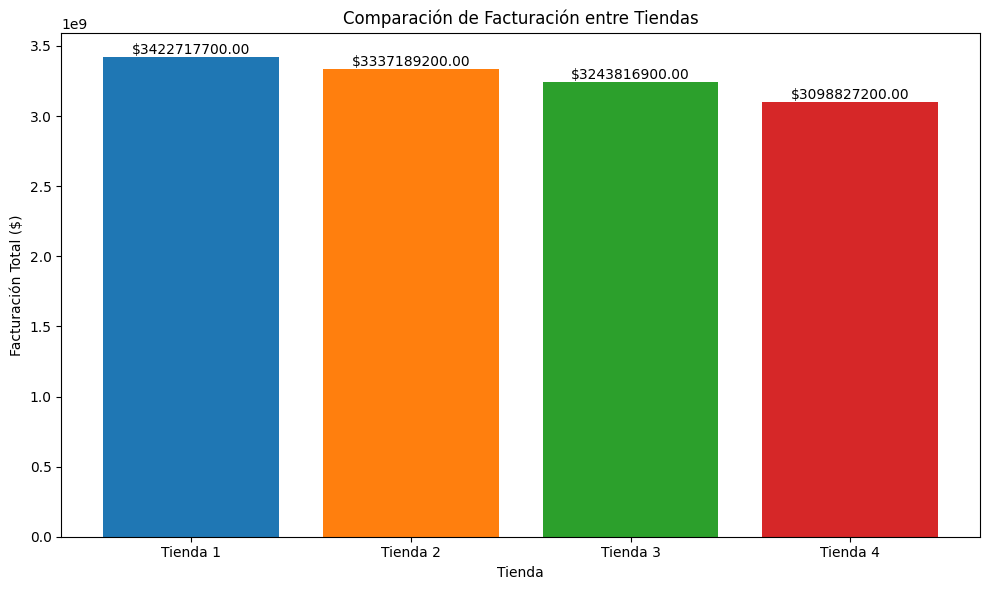

In [8]:
print("\n\n----- PARTE 1: ANÁLISIS DE FACTURACIÓN -----")

facturacion_tiendas = []

for i, tienda in enumerate(tiendas, 1):
    try:
        col_precio = mapeo_columnas[f'tienda{i}']['precio']
        col_cantidad = mapeo_columnas[f'tienda{i}']['cantidad']

        if col_precio and col_cantidad:
            # Convertir a numérico si es necesario
            precio = pd.to_numeric(tienda[col_precio], errors='coerce')
            cantidad = pd.to_numeric(tienda[col_cantidad], errors='coerce')

            # Calcular facturación total
            facturacion = (precio * cantidad).sum()
            facturacion_tiendas.append(facturacion)

            print(f"Tienda {i} - Facturación total: ${facturacion:.2f}")
        else:
            print(f"Tienda {i} - No se puede calcular la facturación por falta de columnas necesarias")
            facturacion_tiendas.append(0)
    except Exception as e:
        print(f"Error al calcular la facturación de tienda {i}: {e}")
        facturacion_tiendas.append(0)

# Gráfico de facturación
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, 5), facturacion_tiendas, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel('Tienda')
plt.ylabel('Facturación Total ($)')
plt.title('Comparación de Facturación entre Tiendas')
plt.xticks(range(1, 5), [f'Tienda {i}' for i in range(1, 5)])

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'${height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('facturacion_tiendas.png')
plt.show()

# 2. Ventas por categoría

In [9]:
# PARTE 2: VENTAS POR CATEGORÍA
print("\n===== PARTE 2: VENTAS POR CATEGORÍA =====")


===== PARTE 2: VENTAS POR CATEGORÍA =====



Tienda 1 - Ventas por categoría:
    Categoría del Producto        Precio  Cantidad de cuotas  ventas_totales
3             Electrónicos  9.586908e+05                1341    1.285604e+09
2        Electrodomésticos  1.165658e+06                 906    1.056086e+09
7                  Muebles  4.035133e+05                1446    5.834803e+08
4   Instrumentos musicales  5.016429e+05                 573    2.874414e+08
1     Deportes y diversión  1.383451e+05                 796    1.101227e+08
5                 Juguetes  5.554228e+04                 872    4.843287e+07
0  Artículos para el hogar  7.425965e+04                 489    3.631297e+07
6                   Libros  5.077977e+04                 520    2.640548e+07

Tienda 2 - Ventas por categoría:
    Categoría del Producto        Precio  Cantidad de cuotas  ventas_totales
3             Electrónicos  9.735334e+05                1333    1.297720e+09
2        Electrodomésticos  1.142845e+06                 890    1.017132e+09
7       

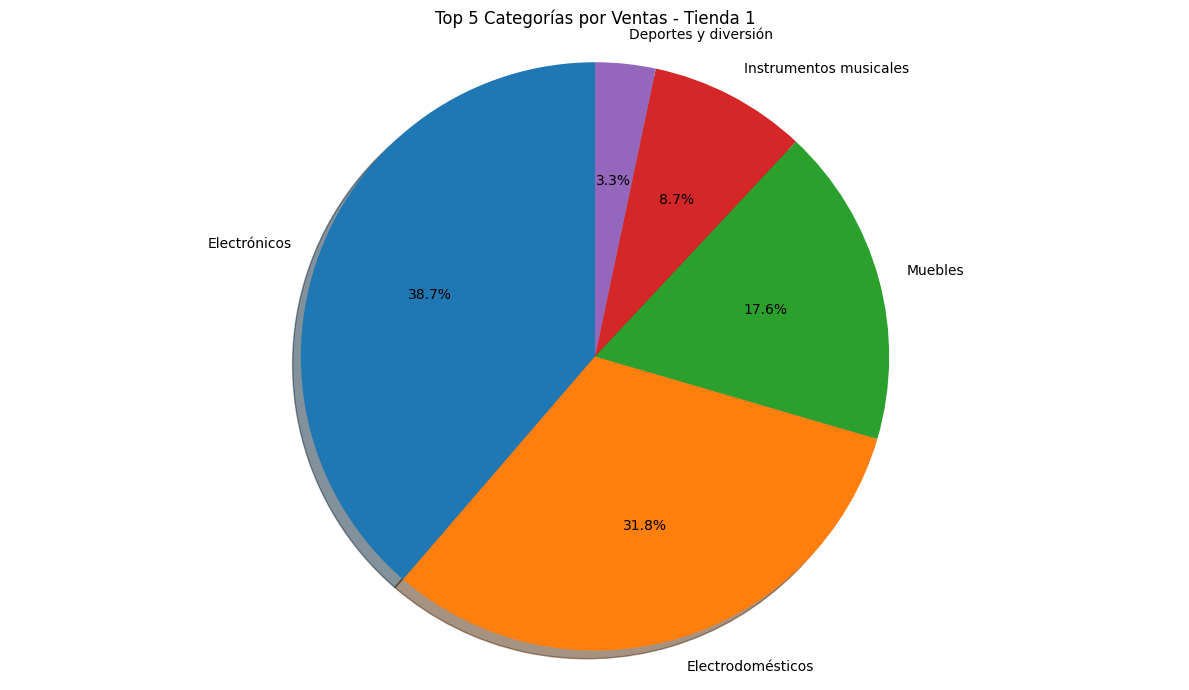

In [15]:
# Lista para almacenar DataFrames de ventas por categoría
ventas_por_categoria = []

# Función para calcular ventas por categoría
def calcular_ventas_categoria(tienda, tienda_num):
    try:
        col_categoria = mapeo_columnas[f'tienda{tienda_num}']['categoria']
        col_precio = mapeo_columnas[f'tienda{tienda_num}']['precio']
        col_cantidad = mapeo_columnas[f'tienda{tienda_num}']['cantidad']

        if col_categoria and col_precio and col_cantidad:
            # Crear columna de ventas
            ventas = pd.to_numeric(tienda[col_precio], errors='coerce') * pd.to_numeric(tienda[col_cantidad], errors='coerce')

            # Agrupar por categoría
            resultado = tienda.groupby(col_categoria).agg({
                col_precio: 'mean',
                col_cantidad: 'sum'
            }).reset_index()

            # Añadir columna de ventas totales
            resultado['ventas_totales'] = resultado[col_precio] * resultado[col_cantidad]

            # Ordenar por ventas totales
            resultado = resultado.sort_values('ventas_totales', ascending=False)

            return resultado
        else:
            print(f"Tienda {tienda_num} - No se pueden calcular ventas por categoría por falta de columnas")
            return pd.DataFrame()
    except Exception as e:
        print(f"Error al calcular ventas por categoría de tienda {tienda_num}: {e}")
        return pd.DataFrame()

# Calcular ventas por categoría para cada tienda
for i, tienda in enumerate(tiendas, 1):
    result = calcular_ventas_categoria(tienda, i)
    if not result.empty:
        ventas_por_categoria.append(result)
        print(f"\nTienda {i} - Ventas por categoría:")
        print(result)
    else:
        ventas_por_categoria.append(pd.DataFrame())

# Gráfico de ventas por categoría para la tienda 1 (como ejemplo)
if not ventas_por_categoria[0].empty:
    plt.figure(figsize=(12, 7))
    # Obtener nombres de columnas correctos
    col_cat = mapeo_columnas['tienda1']['categoria']

    top_categorias = ventas_por_categoria[0].head(5)  # Top 5 categorías

    plt.pie(top_categorias['ventas_totales'],
            labels=top_categorias[col_cat],
            autopct='%1.1f%%',
            startangle=90,
            shadow=True)
    plt.axis('equal')
    plt.title('Top 5 Categorías por Ventas - Tienda 1')
    plt.tight_layout()
    plt.savefig('categorias_tienda1.png')
    plt.show()

# 3. Calificación promedio de la tienda


In [11]:
# PARTE 3: CALIFICACION PROMEDIO DE LA TIENDA
print("\n===== PARTE 3: CALIFICACION PROMEDIO DE LA TIENDA =====")


===== PARTE 3: CALIFICACION PROMEDIO DE LA TIENDA =====


Tienda 1 - Puntuación promedio: 3.98/5
Tienda 2 - Puntuación promedio: 4.04/5
Tienda 3 - Puntuación promedio: 4.05/5
Tienda 4 - Puntuación promedio: 4.00/5


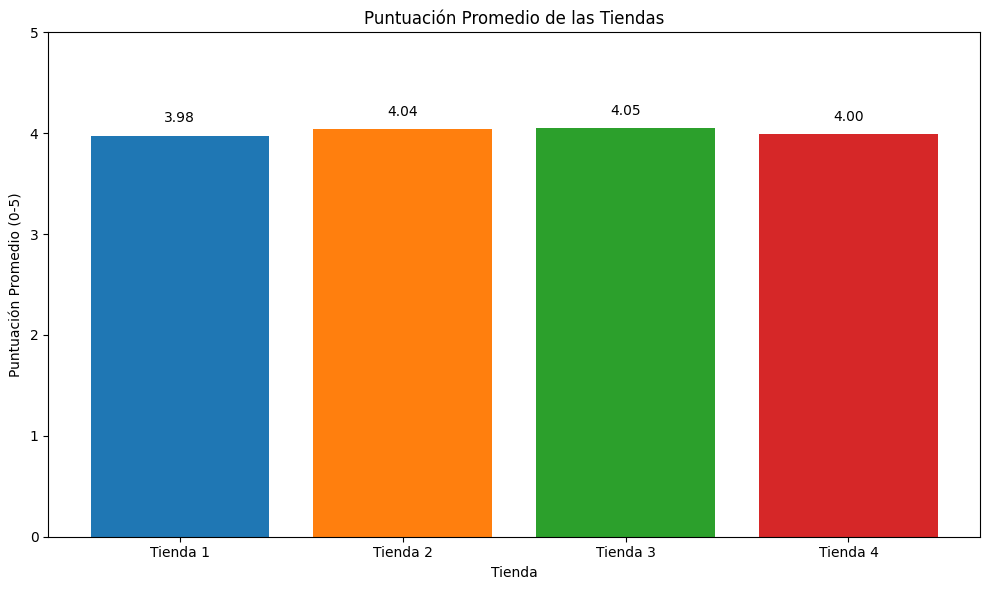

In [16]:
# Calcular puntuación promedio para cada tienda
puntuaciones = []

for i, tienda in enumerate(tiendas, 1):
    try:
        col_opinion = mapeo_columnas[f'tienda{i}']['opinion']

        if col_opinion:
            # Convertir a numérico
            opinion = pd.to_numeric(tienda[col_opinion], errors='coerce')
            promedio = opinion.mean()
            puntuaciones.append(promedio)
            print(f"Tienda {i} - Puntuación promedio: {promedio:.2f}/5")
        else:
            print(f"Tienda {i} - No se puede calcular la puntuación por falta de columna de opinión")
            puntuaciones.append(0)
    except Exception as e:
        print(f"Error al calcular puntuación de tienda {i}: {e}")
        puntuaciones.append(0)

# Gráfico de puntuaciones
plt.figure(figsize=(10, 6))
bars = plt.bar(range(1, 5), puntuaciones, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel('Tienda')
plt.ylabel('Puntuación Promedio (0-5)')
plt.title('Puntuación Promedio de las Tiendas')
plt.xticks(range(1, 5), [f'Tienda {i}' for i in range(1, 5)])
plt.ylim(0, 5)  # Rango de 0 a 5 estrellas

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('puntuaciones_tiendas.png')
plt.show()

# 4. Productos más y menos vendidos

In [17]:
# PARTE 4: PRODUCTOS MAS Y MENOS VENDIDOS
print("\n===== PARTE 4: PRODUCTOS MAS Y MENOS VENDIDOS =====")


===== PARTE 4: PRODUCTOS MAS Y MENOS VENDIDOS =====



Tienda 1 - Top 3 productos más vendidos:
            Producto  Cantidad de cuotas
40  Secadora de ropa                 214
48     TV LED UHD 4K                 196
32     Mesa de noche                 188

Tienda 1 - 3 productos menos vendidos:
          Producto  Cantidad de cuotas
19  Dinosaurio Rex                  94
34         Mochila                  90
13    Celular ABXY                  78

Tienda 2 - Top 3 productos más vendidos:
                     Producto  Cantidad de cuotas
24  Iniciando en programación                 223
25                  Iphone 15                 195
21          Guitarra acústica                 183

Tienda 2 - 3 productos menos vendidos:
           Producto  Cantidad de cuotas
8         Bicicleta                  98
42     Set de vasos                  98
31  Mesa de comedor                  89

Tienda 3 - Top 3 productos más vendidos:
         Producto  Cantidad de cuotas
8       Bicicleta                 191
20         Estufa                 182


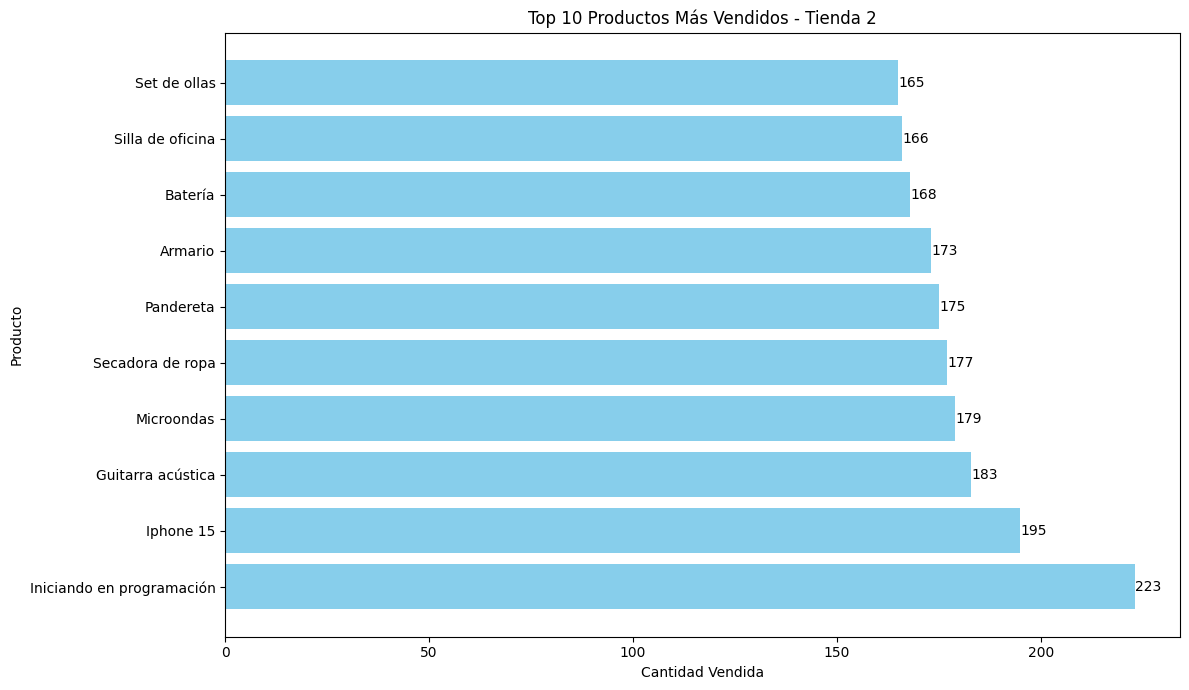

In [18]:
# Lista para almacenar resultados
productos_por_tienda = []

# Analizar productos más y menos vendidos
for i, tienda in enumerate(tiendas, 1):
    try:
        col_producto = mapeo_columnas[f'tienda{i}']['producto']
        col_cantidad = mapeo_columnas[f'tienda{i}']['cantidad']

        if col_producto and col_cantidad:
            # Agrupar por producto y sumar cantidades
            ventas_producto = tienda.groupby(col_producto)[col_cantidad].sum().reset_index()

            # Ordenar por cantidad
            ventas_producto_sorted = ventas_producto.sort_values(col_cantidad, ascending=False)

            # Almacenar resultados
            productos_por_tienda.append(ventas_producto_sorted)

            # Mostrar top 3 productos más vendidos
            print(f"\nTienda {i} - Top 3 productos más vendidos:")
            print(ventas_producto_sorted.head(3))

            # Mostrar 3 productos menos vendidos
            print(f"\nTienda {i} - 3 productos menos vendidos:")
            print(ventas_producto_sorted.tail(3))
        else:
            print(f"Tienda {i} - No se pueden analizar productos por falta de columnas necesarias")
            productos_por_tienda.append(pd.DataFrame())
    except Exception as e:
        print(f"Error al analizar productos de tienda {i}: {e}")
        productos_por_tienda.append(pd.DataFrame())

# Gráfico de los productos más vendidos de la tienda 2 (como ejemplo)
if len(productos_por_tienda) > 1 and not productos_por_tienda[1].empty:
    plt.figure(figsize=(12, 7))

    col_prod = mapeo_columnas['tienda2']['producto']
    col_cant = mapeo_columnas['tienda2']['cantidad']

    # Obtener top 10 productos
    top_productos = productos_por_tienda[1].head(10)

    # Crear gráfico horizontal de barras
    bars = plt.barh(top_productos[col_prod], top_productos[col_cant], color='skyblue')
    plt.xlabel('Cantidad Vendida')
    plt.ylabel('Producto')
    plt.title('Top 10 Productos Más Vendidos - Tienda 2')
    plt.tight_layout()

    # Añadir valores a las barras
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.1, bar.get_y() + bar.get_height()/2.,
                 f'{width:.0f}', va='center')

    plt.savefig('productos_top_tienda2.png')
    plt.show()

# 5. Envío promedio por tienda

In [20]:
# PARTE 5: ENVIO PROMEDIO POR TIENDA
print("\n===== PARTE 5: ENVIO PROMEDIO POR TIENDA =====")


===== PARTE 5: ENVIO PROMEDIO POR TIENDA =====




----- PARTE 5: PROMEDIO DE ENVÍO DE CADA TIENDA -----
Tienda 1 - Tiempo promedio de envío: 26018.61 días
Tienda 2 - Tiempo promedio de envío: 25216.24 días
Tienda 3 - Tiempo promedio de envío: 24805.68 días
Tienda 4 - Tiempo promedio de envío: 23459.46 días


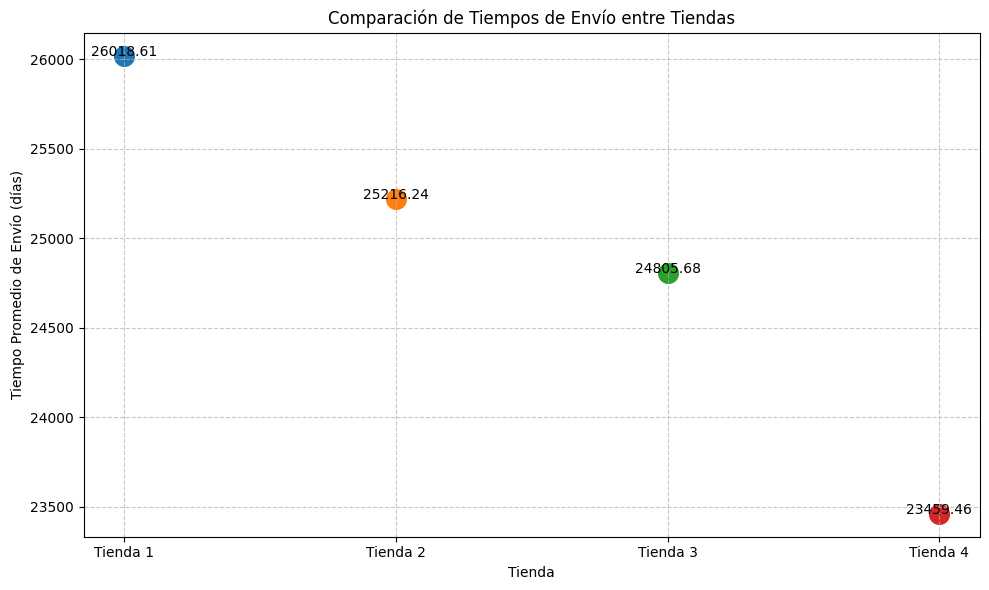

In [21]:
print("\n\n----- PARTE 5: PROMEDIO DE ENVÍO DE CADA TIENDA -----")

# Calcular tiempo promedio de envío para cada tienda
tiempos_envio = []

for i, tienda in enumerate(tiendas, 1):
    try:
        col_envio = mapeo_columnas[f'tienda{i}']['envio']

        if col_envio:
            # Convertir a numérico
            envio = pd.to_numeric(tienda[col_envio], errors='coerce')
            promedio = envio.mean()
            tiempos_envio.append(promedio)
            print(f"Tienda {i} - Tiempo promedio de envío: {promedio:.2f} días")
        else:
            print(f"Tienda {i} - No se puede calcular tiempo de envío por falta de columna")
            tiempos_envio.append(np.nan)
    except Exception as e:
        print(f"Error al calcular tiempo de envío de tienda {i}: {e}")
        tiempos_envio.append(np.nan)

# Gráfico de tiempos de envío (usar gráfico de dispersión para variedad)
plt.figure(figsize=(10, 6))
for i, tiempo in enumerate(tiempos_envio):
    if not np.isnan(tiempo):
        plt.scatter(i+1, tiempo, s=200, color=f'C{i}', label=f'Tienda {i+1}')
        plt.text(i+1, tiempo+0.2, f'{tiempo:.2f}', ha='center')

plt.xlabel('Tienda')
plt.ylabel('Tiempo Promedio de Envío (días)')
plt.title('Comparación de Tiempos de Envío entre Tiendas')
plt.xticks(range(1, 5), [f'Tienda {i}' for i in range(1, 5)])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('tiempos_envio.png')
plt.show()

In [19]:
# PARTE 6: INFORME FINAL PARA EL SR. JUAN
print("\n===== PARTE 6: INFORME FINAL PARA EL SR. JUAN =====")


===== PARTE 6: INFORME FINAL PARA EL SR. JUAN =====




----- ANÁLISIS FINAL Y RECOMENDACIÓN -----

Resumen de indicadores por tienda:
     Tienda   Facturación  Puntuación  Tiempo de Envío
0  Tienda 1  3.422718e+09    3.976685     26018.609580
1  Tienda 2  3.337189e+09    4.037304     25216.235693
2  Tienda 3  3.243817e+09    4.048326     24805.680373
3  Tienda 4  3.098827e+09    3.995759     23459.457167

Tiendas ordenadas por rendimiento (de peor a mejor):
     Tienda  Puntuación_Global   Facturación  Puntuación  Tiempo de Envío
0  Tienda 1           0.598446  3.422718e+09    3.976685     26018.609580
3  Tienda 4           0.600960  3.098827e+09    3.995759     23459.457167
2  Tienda 3           0.601338  3.243817e+09    4.048326     24805.680373
1  Tienda 2           0.604437  3.337189e+09    4.037304     25216.235693

La tienda con el peor rendimiento general es: Tienda 1


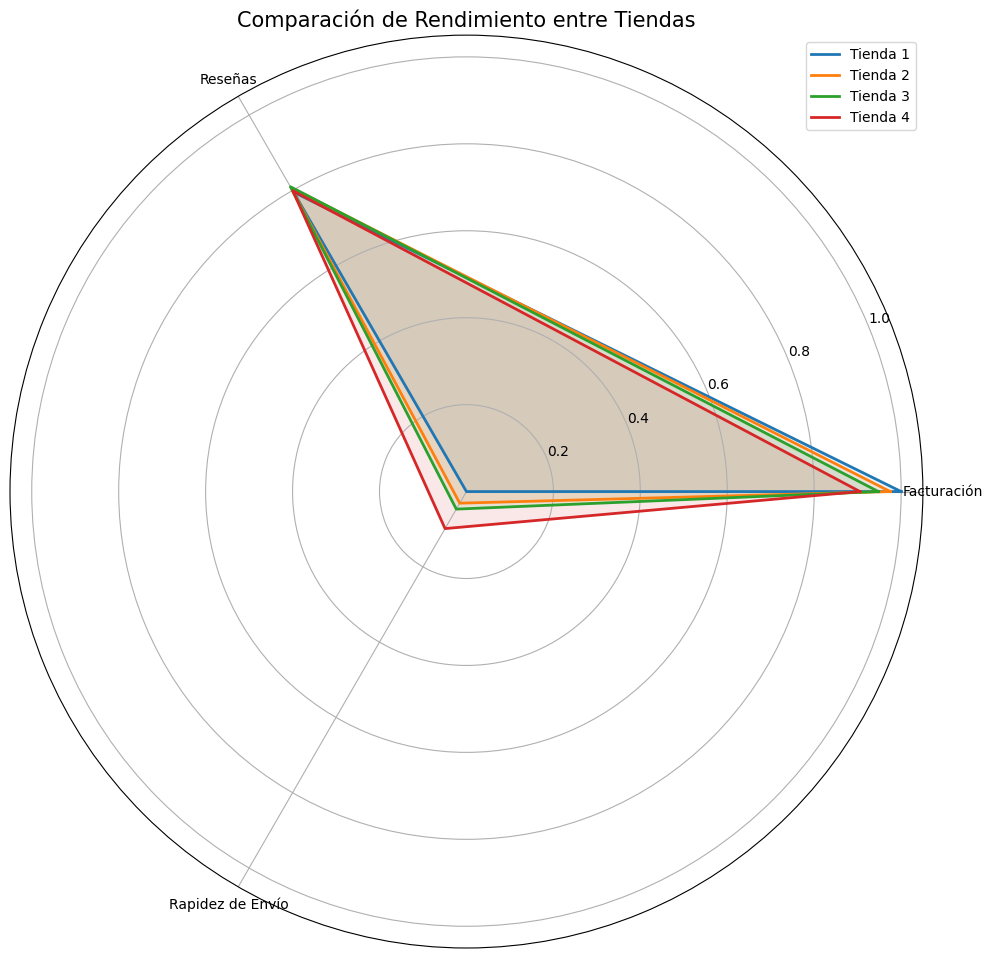

In [22]:
# --------- ANÁLISIS FINAL Y RECOMENDACIÓN ---------
print("\n\n----- ANÁLISIS FINAL Y RECOMENDACIÓN -----")

# Crear un DataFrame para resumir todos los indicadores
resumen = pd.DataFrame({
    'Tienda': [f'Tienda {i}' for i in range(1, 5)],
    'Facturación': facturacion_tiendas,
    'Puntuación': puntuaciones,
    'Tiempo de Envío': tiempos_envio
})

print("\nResumen de indicadores por tienda:")
print(resumen)

# Normalizar indicadores para poder compararlos
# Para facturación y puntuación, más es mejor
# Para tiempo de envío, menos es mejor
resumen['Facturación_Norm'] = resumen['Facturación'] / resumen['Facturación'].max() if resumen['Facturación'].max() > 0 else 0
resumen['Puntuación_Norm'] = resumen['Puntuación'] / 5  # Normalizar sobre 5
resumen['Tiempo_Envío_Norm'] = 1 - (resumen['Tiempo de Envío'] / resumen['Tiempo de Envío'].max() if not resumen['Tiempo de Envío'].isna().all() and resumen['Tiempo de Envío'].max() > 0 else 0)

# Calcular puntuación global (promedio de los 3 indicadores normalizados)
resumen['Puntuación_Global'] = resumen[['Facturación_Norm', 'Puntuación_Norm', 'Tiempo_Envío_Norm']].mean(axis=1)

# Ordenar por puntuación global (ascendente para identificar la peor tienda)
resumen_ordenado = resumen.sort_values('Puntuación_Global')

print("\nTiendas ordenadas por rendimiento (de peor a mejor):")
print(resumen_ordenado[['Tienda', 'Puntuación_Global', 'Facturación', 'Puntuación', 'Tiempo de Envío']])

# Identificar la tienda con el peor rendimiento
peor_tienda = resumen_ordenado.iloc[0]['Tienda']
print(f"\nLa tienda con el peor rendimiento general es: {peor_tienda}")

# Gráfico radar para visualizar rendimiento de todas las tiendas
def crear_grafico_radar(df):
    # Convertir DataFrame a formato para gráfico radar
    categorias = ['Facturación_Norm', 'Puntuación_Norm', 'Tiempo_Envío_Norm']
    n = len(categorias)

    # Crear ángulos para el gráfico radar
    angulos = [i / n * 2 * np.pi for i in range(n)]
    angulos += angulos[:1]  # Cerrar el círculo

    # Crear figura
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

    # Añadir cada tienda al gráfico
    for i, tienda in enumerate(df['Tienda']):
        valores = df.iloc[i][categorias].values.tolist()
        valores += valores[:1]  # Cerrar el círculo

        ax.plot(angulos, valores, linewidth=2, label=tienda)
        ax.fill(angulos, valores, alpha=0.1)

    # Configurar etiquetas y leyenda
    etiquetas = ['Facturación', 'Reseñas', 'Rapidez de Envío']
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(etiquetas)
    ax.set_title('Comparación de Rendimiento entre Tiendas', size=15)

    # Añadir leyenda
    plt.legend(loc='upper right')

    return fig

# Crear y mostrar gráfico radar
radar_fig = crear_grafico_radar(resumen)
plt.tight_layout()
plt.savefig('radar_tiendas.png')
plt.show()

In [24]:
# Informe final para el Sr. Juan
print("\n----- INFORME FINAL -----")
print(f"""
INFORME DE RENDIMIENTO DE TIENDAS ALURA STORE

Estimado Sr. Juan,

Después de un análisis exhaustivo de los datos de sus 4 tiendas, hemos determinado que
{peor_tienda} es la que presenta el rendimiento más bajo basado en tres criterios clave:

1. Facturación: ${resumen_ordenado.iloc[0]['Facturación']:.2f}
2. Puntuación promedio: {resumen_ordenado.iloc[0]['Puntuación']:.2f}/5
3. Tiempo promedio de envío: {resumen_ordenado.iloc[0]['Tiempo de Envío']:.2f} días

Esta tienda ha obtenido la puntuación global más baja de {resumen_ordenado.iloc[0]['Puntuación_Global']:.4f} sobre 1.

Recomendación:
Basándonos en el análisis de los datos proporcionados, recomendamos considerar la venta de
{peor_tienda} para iniciar su nuevo emprendimiento. Esta decisión permitiría optimizar sus
recursos y concentrarse en las tiendas con mejor rendimiento, mientras libera capital para
su nueva iniciativa.

Atentamente,
Equipo de Análisis de Datos
Lider del Equipo: Alumno Miguel Bareiro
""")


----- INFORME FINAL -----

INFORME DE RENDIMIENTO DE TIENDAS ALURA STORE

Estimado Sr. Juan,

Después de un análisis exhaustivo de los datos de sus 4 tiendas, hemos determinado que 
Tienda 1 es la que presenta el rendimiento más bajo basado en tres criterios clave:

1. Facturación: $3422717700.00
2. Puntuación promedio: 3.98/5
3. Tiempo promedio de envío: 26018.61 días

Esta tienda ha obtenido la puntuación global más baja de 0.5984 sobre 1.

Recomendación:
Basándonos en el análisis de los datos proporcionados, recomendamos considerar la venta de 
Tienda 1 para iniciar su nuevo emprendimiento. Esta decisión permitiría optimizar sus 
recursos y concentrarse en las tiendas con mejor rendimiento, mientras libera capital para 
su nueva iniciativa.

Atentamente,
Equipo de Análisis de Datos
Lider del Equipo: Alumno Miguel Bareiro

